In [11]:
import numpy as np
import pandas as pd
from docutils.parsers.rst.directives import encoding

df_raw=pd.read_excel(r'C:\Users\YeShang\Desktop\数据分析基础工具\data\sales.xlsx',index_col='USERID')
df_raw.head()

,ORDERDATE,ORDERID,AMOUNTINFO
USERID,,,
1,2023-05-01,11,1000.0
2,2023-04-02,22,2000.0
3,2023-04-03,33,3000.0
4,2023-04-04,44,4000.0
5,2023-04-05,55,5000.0


In [7]:
#缺失值处理
sales_data=df_raw.dropna()
sales_data=sales_data[sales_data['AMOUNTINFO']>1]

In [8]:
# 数据转换 (按用户ID去重归总)
recency_value = sales_data['ORDERDATE'].groupby(sales_data.index).max()  # 计算最近一次订单时间
frequency_value = sales_data['ORDERDATE'].groupby(sales_data.index).count()  # 计算订单频率
monetary_value = sales_data['AMOUNTINFO'].groupby(sales_data.index).sum()  # 计算订单总金额


In [9]:
# 分别计算 R, F, M 得分
deadline_date = pd.to_datetime("2024-05-01")  # 指定一个时间节点，用来计算其他时间和该时间的距离
r_interval = (deadline_date - recency_value).dt.days  # 计算 R 间隔
r_score = pd.cut(r_interval, 5, labels=[5, 4, 3, 2, 1])  # 计算 R 得分，五分位倒序
f_score = pd.cut(frequency_value, 5, labels=[1, 2, 3, 4, 5])  # 计算 F 得分
m_score = pd.cut(monetary_value, 5, labels=[1, 2, 3, 4, 5])  # 计算 M 得分

In [12]:
# R, F, M 数据合并
rfm_list = [r_score, f_score, m_score]  # 将 R, F, M 三个维度组成列表
rfm_cols = ['r_score', 'f_score', 'm_score']  # 设置 R, F, M 三个维度的列名
rfm_pd = pd.DataFrame(np.array(rfm_list).transpose(), dtype=np.int32, columns=rfm_cols, index=frequency_value.index)  # 建立 R, F, M 数据框

In [13]:
# 策略2：RFM组合 直接输出三维度值
rfm_pd_tmp = rfm_pd.copy()
rfm_pd_tmp['r_score'] = rfm_pd_tmp['r_score'].astype('str')
rfm_pd_tmp['f_score'] = rfm_pd_tmp['f_score'].astype('str')
rfm_pd_tmp['m_score'] = rfm_pd_tmp['m_score'].astype('str')
rfm_pd['rfm_comb'] = rfm_pd_tmp['r_score'].str.cat(rfm_pd_tmp['f_score']).str.cat(rfm_pd_tmp['m_score'])

In [14]:
import numpy as np
import pandas as pd

# 导入数据
df_raw = pd.DataFrame(pd.read_excel(r'C:\Users\YeShang\Desktop\数据分析基础工具\data\sales.xlsx',index_col='USERID'))

# 缺失值处理
sales_data = df_raw.dropna() # 丢失带有缺失值NA的行记录
sales_data = sales_data[sales_data['AMOUNTINFO'] > 1] # 丢弃订单金额<=1的记录

# 数据转换 (按用户id去重归总)
recency_value = sales_data['ORDERDATE'].groupby(sales_data.index).max() #计算最近一次订单时间
frequency_value = sales_data['ORDERDATE'].groupby(sales_data.index).count() #计算订单频率
monetary_value = sales_data['AMOUNTINFO'].groupby(sales_data.index).sum() #计算订单总金额

# 分别计算R,F,M得分
deadline_date = pd.to_datetime("2020-05-01") #指定一个时间节点，用来计算其他时间和改时间的距离
r_interval = (deadline_date - recency_value).dt.days #计算r间隔
r_score = pd.cut(r_interval, 5, labels=[5,4,3,2,1]) # 计算r得分 五分位倒序
f_score = pd.cut(frequency_value, 5, labels=[1,2,3,4,5]) # 计算f得分
m_score = pd.cut(monetary_value, 5, labels=[1,2,3,4,5]) # 计算m得分

# R,F,M数据合并
rfm_list = [r_score, f_score, m_score] # 将R,F,M三个维度组成列表
rfm_cols = ['r_score', 'f_score', 'm_score'] # 设置R,F,M三个维度的列名
rfm_pd = pd.DataFrame(np.array(rfm_list).transpose(), dtype=np.int32, columns=rfm_cols, index=frequency_value.index) #建立R,F,M数据框

#策略1：加权得分 定义用户价值
rfm_pd['rfm_wscore'] = rfm_pd['r_score']*0.2 + rfm_pd['f_score']*0.2 + rfm_pd['m_score']*0.6

In [15]:
# 导出数据
rfm_pd.to_csv('rfm_result.csv')

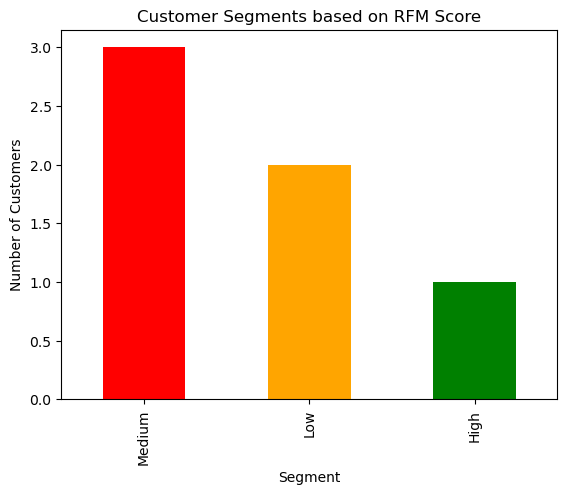

In [16]:
import matplotlib.pyplot as plt

# 根据加权得分划分客户群体
bins = [0, 2, 4, 5]  # 自定义分层阈值
labels = ['Low', 'Medium', 'High']  # 分层标签
rfm_pd['Customer Segment'] = pd.cut(rfm_pd['rfm_wscore'], bins=bins, labels=labels)

# 绘制柱状图
rfm_pd['Customer Segment'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Customer Segments based on RFM Score')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

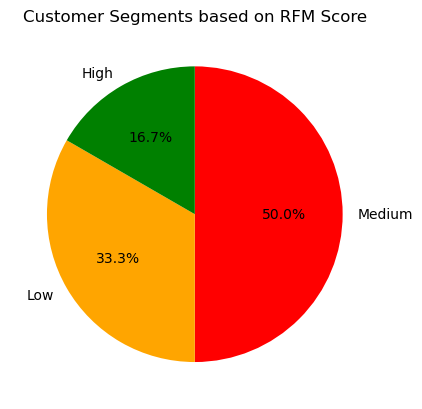

In [17]:
import matplotlib.pyplot as plt

# 根据加权得分划分客户群体
bins = [0, 2, 4, 5]  # 自定义分层阈值
labels = ['Low', 'Medium', 'High']  # 分层标签
rfm_pd['Customer Segment'] = pd.cut(rfm_pd['rfm_wscore'], bins=bins, labels=labels)

# 绘制饼状图
rfm_pd['Customer Segment'].value_counts().plot(kind='pie',
                                               colors=['red', 'orange', 'green'],
                                               autopct='%1.1f%%',  # 显示百分比
                                               startangle=90,      # 旋转起始角度
                                               counterclock=False) # 顺时针方向
plt.title('Customer Segments based on RFM Score')
plt.ylabel('')  # 隐藏Y轴标签
plt.show()